Diego García Maroto (diegar20@ucm.es)

# Práctica 2: Análisis de extremos, análisis espectral y filtros

In [1]:
### IMPORTS ###
# Módulos básicos y otros
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

# Estadística
from scipy import stats 
from scipy import special

# Cartografía 
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from cartopy.util import add_cyclic_point
import cartopy.io.shapereader as shpreader

# Lectura de datos
from netCDF4 import Dataset
import xarray as xr

# Índices Climáticos
from xclim.core.calendar import percentile_doy
from xclim.indices import tn10p, tx10p

Vamos a calcular los siguientes indices de extremos:

![title](./img/index.png)

Lectura de datos (necesitaremos tanto Tmax como Tmin):

In [4]:
path = './data/'
file_max = 'tmax_pen.nc'
data_max = xr.open_dataset(path+file_max)
file_min = 'tmin_pen.nc'
data_min = xr.open_dataset(path+file_min)
display(data_max)
data_min

<xarray.Dataset>
Dimensions:  (lon: 230, lat: 190, Time: 41638)
Coordinates:
  * lon      (lon) float64 -9.673 -9.614 -9.556 -9.497 ... 3.607 3.665 3.724
  * lat      (lat) float64 44.17 44.12 44.08 44.03 ... 35.8 35.75 35.71 35.66
  * Time     (Time) datetime64[ns] 1901-01-02 1901-01-03 ... 2015-01-01
Data variables:
    tx       (Time, lat, lon) float32 ...
Attributes: (12/13)
    title:             Daily maximum temperature of peninsular Spain
    history:           version 1.0
    keywords:          daily, maximum temperature, peninsular Spain, Spain
    creator_name:      Roberto Serrano-Notivoli; Martin de Luis; Santiago Beg...
    maintainer_name:   Roberto Serrano-Notivoli
    maintainer_email:  rs@unizar.es
    ...                ...
    processing_level:  Quality-controlled. Final values.
    acknowledgment:    This study was supported by research projects financed...
    units:             Celsius degrees
    id:                STEAD
    sources:           AEMET and MAGRAMA
    naming_authority:  Spanish TEmperature At Daily scale

<xarray.Dataset>
Dimensions:  (lon: 230, lat: 190, Time: 41638)
Coordinates:
  * lon      (lon) float64 -9.673 -9.614 -9.556 -9.497 ... 3.607 3.665 3.724
  * lat      (lat) float64 44.17 44.12 44.08 44.03 ... 35.8 35.75 35.71 35.66
  * Time     (Time) datetime64[ns] 1901-01-02 1901-01-03 ... 2015-01-01
Data variables:
    tn       (Time, lat, lon) float32 ...
Attributes: (12/13)
    title:             Daily minimum temperature of peninsular Spain
    history:           version 1.0
    keywords:          daily, minimum temperature, peninsular Spain, Spain
    creator_name:      Roberto Serrano-Notivoli; Martin de Luis; Santiago Beg...
    maintainer_name:   Roberto Serrano-Notivoli
    maintainer_email:  rs@unizar.es
    ...                ...
    processing_level:  Quality-controlled. Final values.
    acknowledgment:    This study was supported by research projects financed...
    units:             Celsius degrees
    id:                STEAD
    sources:           AEMET and MAGRAMA
    naming_authority:  Spanish TEmperature At Daily scale

In [5]:
# Separamos las variables (las lat y lon son las mismas al ser la misma base de datos)
lon = data_min.lon
lat = data_min.lat
tmin = data_min.tn
tmax = data_max.tx
display(tmax)
display(tmin)

<xarray.DataArray 'tx' (Time: 41638, lat: 190, lon: 230)>
[1819580600 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -9.673 -9.614 -9.556 -9.497 ... 3.607 3.665 3.724
  * lat      (lat) float64 44.17 44.12 44.08 44.03 ... 35.8 35.75 35.71 35.66
  * Time     (Time) datetime64[ns] 1901-01-02 1901-01-03 ... 2015-01-01
Attributes:
    units:      Celsius degrees
    long_name:  Maximum temperature

<xarray.DataArray 'tn' (Time: 41638, lat: 190, lon: 230)>
[1819580600 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -9.673 -9.614 -9.556 -9.497 ... 3.607 3.665 3.724
  * lat      (lat) float64 44.17 44.12 44.08 44.03 ... 35.8 35.75 35.71 35.66
  * Time     (Time) datetime64[ns] 1901-01-02 1901-01-03 ... 2015-01-01
Attributes:
    units:      Celsius degrees
    long_name:  Minimum temperature

In [67]:
ref_period=['1961','1990']

period = ['1901','2014']
try: 
    p10 = np.load('Percentile10.npy')
except:
    p10 = np.nanpercentile(tmin.sel(Time=slice(ref_period[0],ref_period[1])) ,10,axis=0)
    np.save('Percentile10',p10)
tmin_period = tmin.sel(Time=slice(period[0],period[1]))


In [23]:
num_cold = np.sum(np.where(tmin_period<p10,1,0),axis=0)


In [24]:
nt = tmin_period.Time.size
percent_cold = num_cold/nt*100

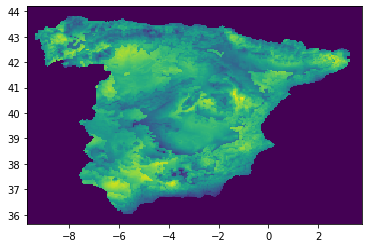

In [25]:
plt.pcolor(lon,lat,percent_cold)

In [26]:
# Downloaded from http://biogeo.ucdavis.edu/data/gadm2/shp/DEU_adm.zip
fname = './mapas/gadm41_ESP_1.shp'

adm1_shapes = list(shpreader.Reader(fname).geometries())

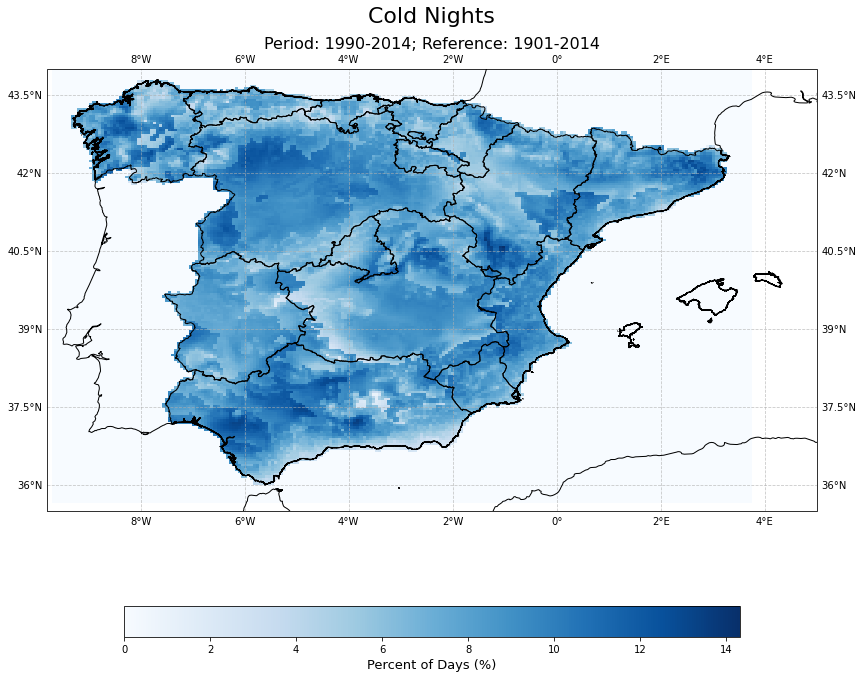

In [90]:
fig, ax = plt.subplots(figsize=(12, 10), ncols=1)
ax=plt.subplot(1,1,1,projection=ccrs.PlateCarree())

plt.suptitle('Cold Nights',size=22)
plt.title('Period: 1901-2014; Reference: 1961-1990',size=16)
ax.coastlines(resolution='10m')#, linewidth=2)

ax.add_geometries(adm1_shapes, ccrs.PlateCarree(), # Cuidado con los sistemas de coordenadas, esto esta definido solo para este sistema
                  edgecolor='black', facecolor='None', alpha=1)


ax.set_global() # added following an answer to my question
#ax.gridlines()
ax.gridlines(draw_labels = True,linestyle='--',alpha=0.7,zorder=1)

ax.set_extent([-9.8,5,35.5,44], ccrs.PlateCarree())
#ax.set_extent([-9,-6,42,43.8], ccrs.PlateCarree())

step = 0.01
var = percent_cold
cmin=np.nanmin(var)
cmax=np.nanmax(var)+step
levels=np.arange(cmin,cmax,step)
levels=np.arange(0,10,step)

im = ax.pcolormesh(lon,lat,var.squeeze(),cmap='Blues',vmin=0, vmax=cmax, transform =ccrs.PlateCarree()) # En transform se pone la proyección default en la que está los datos 
cbar = fig.colorbar(im,ax=ax,orientation = 'horizontal',shrink=0.8)
cbar.set_label(label='Percent of Days (%)',size=13)
plt.tight_layout()

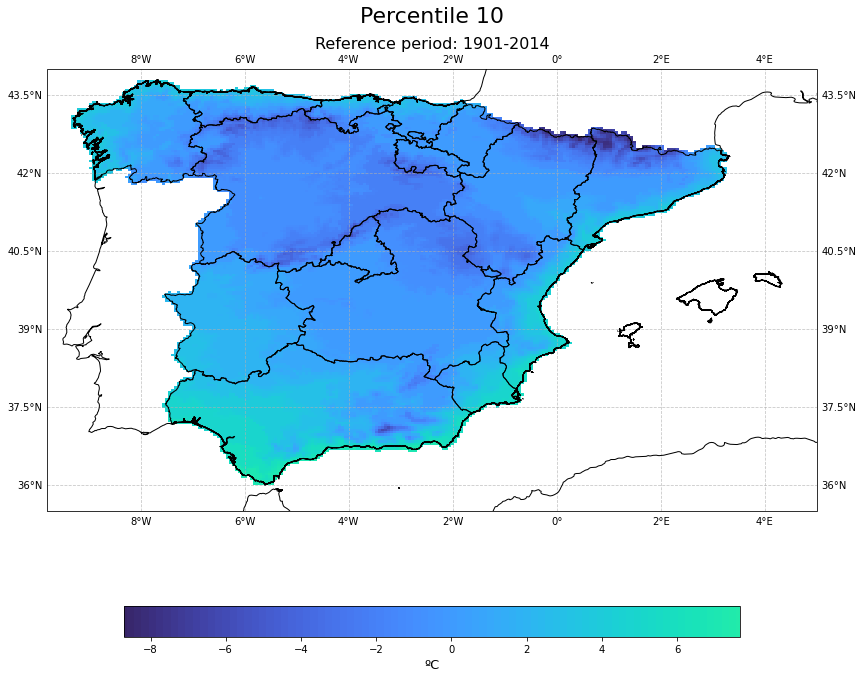

In [85]:
fig, ax = plt.subplots(figsize=(12, 10), ncols=1)
ax=plt.subplot(1,1,1,projection=ccrs.PlateCarree())

plt.suptitle('Percentile 10',size=22)
plt.title('Reference period: 1961-1990',size=16)
ax.coastlines(resolution='10m')#, linewidth=2)

ax.add_geometries(adm1_shapes, ccrs.PlateCarree(), # Cuidado con los sistemas de coordenadas, esto esta definido solo para este sistema
                  edgecolor='black', facecolor='None', alpha=1)


ax.set_global() # added following an answer to my question
#ax.gridlines()
ax.gridlines(draw_labels = True,linestyle='--',alpha=0.7,zorder=1)

ax.set_extent([-9.8,5,35.5,44], ccrs.PlateCarree())

step = 0.5
var = p10
cmin=np.nanmin(var)
cmax=np.nanmax(var)+step
levels=np.arange(cmin,cmax,step)
levels=np.arange(0,10,step)


im = ax.pcolormesh(lon,lat,var.squeeze(),cmap='turbo',vmin=-10, vmax=40, transform =ccrs.PlateCarree()) # En transform se pone la proyección default en la que está los datos 
cbar = fig.colorbar(im,ax=ax,orientation = 'horizontal',shrink=0.8)
cbar.set_label(label='ºC',size=13)
cbar.ax.set_xlim(cmin, cmax)
plt.tight_layout()

Analicemos ahora el caso de la región Oeste:

In [29]:
lat_oeste = [42,43.8]
lon_oeste = [-9,-6]
tminO = tmin.sel(lon=slice(lon_oeste[0],lon_oeste[1]),lat=slice(lat_oeste[1],lat_oeste[0]))
display(slice(lat_oeste[0],lat_oeste[1]))
tminO

slice(42, 43.8, None)

<xarray.DataArray 'tn' (Time: 41638, lat: 40, lon: 51)>
[84941520 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -8.971 -8.912 -8.854 -8.795 ... -6.163 -6.104 -6.046
  * lat      (lat) float64 43.76 43.72 43.67 43.63 ... 42.14 42.1 42.05 42.01
  * Time     (Time) datetime64[ns] 1901-01-02 1901-01-03 ... 2015-01-01
Attributes:
    units:      Celsius degrees
    long_name:  Minimum temperature

In [33]:
tminO.attrs['units'] = 'degC'
tminO


<xarray.DataArray 'tn' (time: 41638, lat: 40, lon: 51)>
[84941520 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -8.971 -8.912 -8.854 -8.795 ... -6.163 -6.104 -6.046
  * lat      (lat) float64 43.76 43.72 43.67 43.63 ... 42.14 42.1 42.05 42.01
  * time     (time) datetime64[ns] 1901-01-02 1901-01-03 ... 2015-01-01
Attributes:
    units:      degC
    long_name:  Minimum temperature

In [34]:
base = tminO.sel(time=slice('1961','1990'))
base

<xarray.DataArray 'tn' (time: 10957, lat: 40, lon: 51)>
[22352280 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -8.971 -8.912 -8.854 -8.795 ... -6.163 -6.104 -6.046
  * lat      (lat) float64 43.76 43.72 43.67 43.63 ... 42.14 42.1 42.05 42.01
  * time     (time) datetime64[ns] 1961-01-01 1961-01-02 ... 1990-12-31
Attributes:
    units:      degC
    long_name:  Minimum temperature

In [35]:
tas_per = percentile_doy(base, per=10).sel(percentiles=10)
cold_days = tn10p(tminO.sel(time=slice('1901','2014')), tas_per)

c:\Users\digar7\anaconda3\envs\env1\lib\site-packages\xclim\core\utils.py:429: RuntimeWarning: All-NaN slice encountered
  result = np.where(np.isnan(interpolation), np.nanmax(arr, axis=0), interpolation)


In [41]:
percentile_doy(base, per=10)

c:\Users\digar7\anaconda3\envs\env1\lib\site-packages\xclim\core\utils.py:429: RuntimeWarning: All-NaN slice encountered
  result = np.where(np.isnan(interpolation), np.nanmax(arr, axis=0), interpolation)


<xarray.DataArray 'per' (lat: 40, lon: 51, dayofyear: 366, percentiles: 1)>
array([[[[            nan],
         [            nan],
         [            nan],
         ...,
         [            nan],
         [            nan],
         [            nan]],

        [[            nan],
         [            nan],
         [            nan],
         ...,
         [            nan],
         [            nan],
         [            nan]],

        [[            nan],
         [            nan],
         [            nan],
         ...,
...
         ...,
         [-4.00232520e+00],
         [-4.42592570e+00],
         [-5.00000000e+00]],

        [[-5.99709829e+00],
         [-5.99999205e+00],
         [-6.00000000e+00],
         ...,
         [-4.00010760e+00],
         [-4.02232329e+00],
         [-5.00000000e+00]],

        [[-5.97131681e+00],
         [-5.99992142e+00],
         [-6.00000000e+00],
         ...,
         [-3.98954055e+00],
         [-4.00272663e+00],
         [-4.99521947e+00]]]])
Coordinates:
  * lon          (lon) float64 -8.971 -8.912 -8.854 ... -6.163 -6.104 -6.046
  * lat          (lat) float64 43.76 43.72 43.67 43.63 ... 42.1 42.05 42.01
  * percentiles  (percentiles) int32 10
  * dayofyear    (dayofyear) int32 1 2 3 4 5 6 7 ... 360 361 362 363 364 365 366
Attributes:
    units:               degC
    long_name:           Minimum temperature
    climatology_bounds:  ['1961-01-01', '1990-12-31']
    window:              5
    alpha:               0.3333333333333333
    beta:                0.3333333333333333
    history:             [2022-11-16 18:57:33] per: percentile_doy(arr=tn, wi...

In [36]:
cold_days

<xarray.DataArray (time: 114, lat: 40, lon: 51)>
array([[[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [42, 51, 60, ..., 19, 21, 21],
        [ 0, 39, 66, ..., 21, 21, 20],
        [ 0, 35, 60, ..., 22, 22, 25]],

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [30, 39, 46, ..., 27, 27, 27],
        [ 0, 31, 53, ..., 28, 26, 22],
        [ 0, 30, 48, ..., 28, 30, 26]],

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
...
        ...,
        [13, 19, 23, ..., 59, 59, 64],
        [ 0, 13, 20, ..., 59, 62, 63],
        [ 0, 10, 18, ..., 61, 62, 61]],

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [20, 27, 27, ..., 50, 53, 62],
        [ 0, 20, 24, ..., 42, 48, 54],
        [ 0, 20, 24, ..., 43, 51, 54]],

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 5,  6,  5, ..., 25, 31, 28],
        [ 0,  4,  4, ..., 25, 25, 24],
        [ 0,  2,  6, ..., 19, 24, 25]]])
Coordinates:
  * lon          (lon) float64 -8.971 -8.912 -8.854 ... -6.163 -6.104 -6.046
  * lat          (lat) float64 43.76 43.72 43.67 43.63 ... 42.1 42.05 42.01
    percentiles  int32 10
  * time         (time) datetime64[ns] 1901-01-01 1902-01-01 ... 2014-01-01
Attributes:
    units:    d

In [83]:
cold_2014 = cold_days.sel(time='2014')
cold_2014 = cold_days.mean(dim='time')

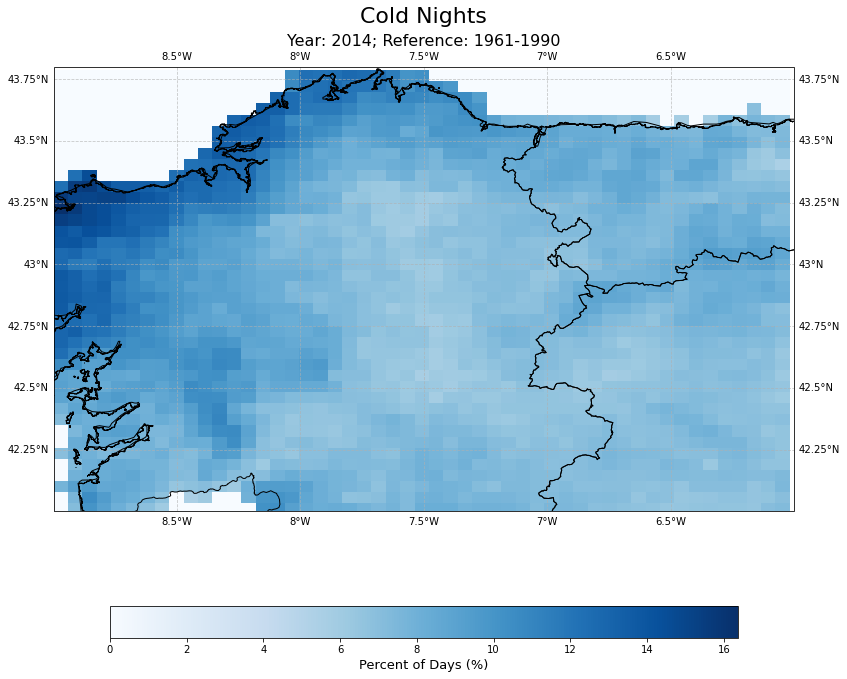

In [84]:
fig, ax = plt.subplots(figsize=(12, 10), ncols=1)
ax=plt.subplot(1,1,1,projection=ccrs.PlateCarree())

plt.suptitle('Cold Nights',size=22)
plt.title('Year: 2014; Reference: 1961-1990',size=16)
ax.coastlines(resolution='10m')#, linewidth=2)

ax.add_geometries(adm1_shapes, ccrs.PlateCarree(), # Cuidado con los sistemas de coordenadas, esto esta definido solo para este sistema
                  edgecolor='black', facecolor='None', alpha=1)


ax.set_global() # added following an answer to my question
#ax.gridlines()
ax.gridlines(draw_labels = True,linestyle='--',alpha=0.7,zorder=1)

ax.set_extent([-9,-6,42,43.8], ccrs.PlateCarree())

step = 0.01
var = cold_2014/365*100
cmin=np.nanmin(var)
cmax=np.nanmax(var)+step
levels=np.arange(cmin,cmax,step)
levels=np.arange(0,10,step)

im = ax.pcolormesh(var.lon,var.lat,var.squeeze(),cmap='Blues',vmin=0, vmax=cmax, transform =ccrs.PlateCarree()) # En transform se pone la proyección default en la que está los datos 
cbar = fig.colorbar(im,ax=ax,orientation = 'horizontal',shrink=0.8)
cbar.set_label(label='Percent of Days (%)',size=13)
plt.tight_layout()

In [39]:
mean_west_nights = cold_days.mean(dim=['lon','lat'])/365*100
mean_west_nights

<xarray.DataArray (time: 114)>
array([10.01799624,  7.82070911,  4.07507387,  1.83145313,  5.22172979,
        2.21877518,  4.23489122,  2.23596562,  8.9529949 ,  6.65323664,
        9.39564867, 12.55479452,  4.75543916,  8.30929358,  7.54821381,
       10.57950577, 18.73287671,  8.2749127 ,  7.52135375,  4.62476497,
        1.2258931 ,  4.3648939 ,  5.06003223,  4.60273973,  7.79438625,
        3.04781091,  9.11254365,  4.10381413,  5.96024711,  5.73905453,
       17.43835616, 13.17029277,  8.14410422, 11.88960516,  9.38409885,
        3.58622079,  1.7272361 ,  5.01208703,  3.64638732,  7.57856567,
        7.82890142,  6.15028203,  2.39873758,  6.95970991, 10.37751813,
       14.21944668,  9.77759871,  6.05439162,  6.1369863 ,  9.19003492,
       13.10381413,  9.82487241,  9.75651356,  9.89551437,  4.0463336 ,
       14.42613484,  8.62919688,  8.08299758,  3.27719581,  8.18815471,
        1.62288477,  6.92022562,  9.55748053,  6.66894977, 10.80056406,
        5.16438356,  6.32755842,  4.57937147,  8.57467096, 12.51907064,
        8.94654848, 13.0012087 , 12.21998388, 16.40598979, 10.20695676,
        9.82809562, 10.58044588,  9.14047811,  6.1377921 ,  9.93217835,
        6.97219984,  3.29613215,  6.04002149, 10.35226967, 10.01101262,
        8.01893634,  6.07332796,  4.40397529,  4.39726027,  4.91149611,
        8.08219178,  8.99395649,  9.01584743,  4.91552511,  4.39846898,
        6.30768198,  4.19272092,  4.87362342,  4.35683589,  6.55573462,
        8.15256514,  4.76537738,  4.13900081,  6.34662906,  8.74362074,
        5.15444534,  7.4073328 ,  6.91753962,  5.6353747 ,  8.86865431,
        3.24523234,  8.12677948,  6.60099382,  2.57561107])
Coordinates:
    percentiles  int32 10
  * time         (time) datetime64[ns] 1901-01-01 1902-01-01 ... 2014-01-01

In [40]:
#mean_west_nights.plot()
#  conda install -c conda-forge nc-time-axis

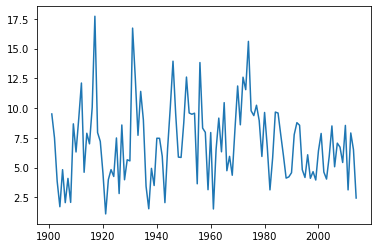

In [24]:
plt.plot(mean_west_nights['time.year'],mean_west_nights)

In [55]:
tminOm = tminO.mean(dim=['lon','lat'],keep_attrs=True)
tminOm

<xarray.DataArray 'tn' (time: 41638)>
array([ 2.3032253 ,  1.679131  ,  1.7624679 , ..., -1.5089166 ,
       -1.5696096 , -0.08151622], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1901-01-02 1901-01-03 ... 2015-01-01
Attributes:
    units:      degC
    long_name:  Minimum temperature

In [56]:
basem = tminOm.sel(time=slice('1961','1990'))
basem

<xarray.DataArray 'tn' (time: 10957)>
array([2.3487177 , 0.86258835, 2.015206  , ..., 3.645706  , 5.783328  ,
       5.418103  ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1961-01-01 1961-01-02 ... 1990-12-31
Attributes:
    units:      degC
    long_name:  Minimum temperature

In [64]:
tas_perm = percentile_doy(basem, per=10).sel(percentiles=10)
cold_daysm = tn10p(tminOm.sel(time=slice('1901','2014')), tas_perm)

In [65]:
cold_daysm = cold_daysm/365*100

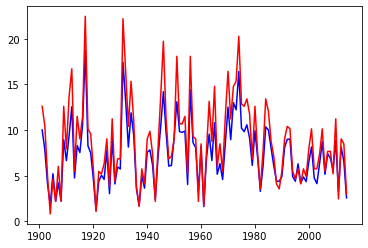

In [66]:
plt.plot(mean_west_nights['time.year'],mean_west_nights,'b')
plt.plot(cold_daysm['time.year'],cold_daysm,'r')

---

Hacemos primero el mapa de España con todas las zonas:

In [2]:
# Defino funciones para calcular el índice y los percentiles mediante el módulo xclim
def cold_nights_xclim(tmin:xr.DataArray, period:list, ref_period=['1961','1990']):
    try:
        tmin.time
        print('Funciono bien :)')
    except: 
        tmin = tmin.rename({'Time': 'time'})
        print('Te he cambiado el tiempo')
    #tmin = tmin.convert_calendar('noleap',dim='time')
    print('>> Calculando percentiles')
    tmin.attrs['units'] = 'degC'
    base = tmin.sel(time=slice('1961','1990'))
    tmin_per = percentile_doy(base, per=10).sel(percentiles=10)
    print('>> Percentiles calculados')
    print('>> Calculando indice')
    num_cold = tn10p(tmin.sel(time=slice(period[0],period[1])), tmin_per)
    percent_cold_nights = num_cold/365*100
    print('>> Índice calculado')
    return tmin_per, percent_cold_nights

def cold_days_xclim(tmax:xr.DataArray, period:list, ref_period=['1961','1990']):
    try: tmax.time
    except: tmax = tmax.rename({'Time': 'time'})
    #tmax = tmax.convert_calendar('noleap',dim='time')
    print('>> Calculando percentiles')
    tmax.attrs['units'] = 'degC'
    base = tmax.sel(time=slice('1961','1990'))
    tmax_per = percentile_doy(base, per=10).sel(percentiles=10)
    print('>> Percentiles calculados')
    print('>> Calculando indice')
    num_cold = tn10p(tmax.sel(time=slice(period[0],period[1])), tmax_per)
    percent_cold_days = num_cold/365*100
    print('>> Índice calculado')
    return tmax_per, percent_cold_days


In [8]:
lat_oeste = [42,43.8]
lon_oeste = [-9,-6]
tminO = tmin.sel(lon=slice(lon_oeste[0],lon_oeste[1]),lat=slice(lat_oeste[1],lat_oeste[0]))
try:
    tmin_p10_O = xr.open_dataarray('./outs/tmin_p10_O.nc')
    percent_cold_nights_O = xr.open_dataarray('./outs/percent_cold_nights_O.nc')
except: 
    tmin_p10_O, percent_cold_nights_O = cold_nights_xclim(tminO,['1901','2014'])
    tmin_p10_O.to_netcdf('./outs/tmin_p10_O.nc')
    percent_cold_nights_O.to_netcdf('./outs/percent_cold_nights_O.nc')
display(tmin_p10_O)
display(percent_cold_nights_O)

<xarray.DataArray 'per' (lat: 40, lon: 51, dayofyear: 366)>
[746640 values with dtype=float64]
Coordinates:
  * lon          (lon) float64 -8.971 -8.912 -8.854 ... -6.163 -6.104 -6.046
  * lat          (lat) float64 43.76 43.72 43.67 43.63 ... 42.1 42.05 42.01
    percentiles  int32 ...
  * dayofyear    (dayofyear) int32 1 2 3 4 5 6 7 ... 360 361 362 363 364 365 366
Attributes:
    units:               °C
    long_name:           Minimum temperature
    climatology_bounds:  ['1961-01-01', '1990-12-31']
    window:              5
    alpha:               0.3333333333333333
    beta:                0.3333333333333333
    history:             [2022-11-17 00:30:33] per: percentile_doy(arr=tn, wi...

<xarray.DataArray (time: 114, lat: 40, lon: 51)>
[232560 values with dtype=float64]
Coordinates:
  * lon          (lon) float64 -8.971 -8.912 -8.854 ... -6.163 -6.104 -6.046
  * lat          (lat) float64 43.76 43.72 43.67 43.63 ... 42.1 42.05 42.01
    percentiles  int32 ...
  * time         (time) datetime64[ns] 1901-01-01 1902-01-01 ... 2014-01-01

In [9]:
try: 
    tmin_p10_E = xr.open_dataarray('./outs/tmin_p10_E.nc')
    percent_cold_nights_E = xr.open_dataarray('./outs/percent_cold_nights_E.nc')
except:
    tmin_p10_E, percent_cold_nights_E = cold_nights_xclim(tmin.sel(lat=slice(43,36.2),lon=slice(-2,4)),['1901','2014'])
    tmin_p10_E.to_netcdf('./outs/tmin_p10_E.nc')
    percent_cold_nights_E.to_netcdf('./outs/percent_cold_nights_E.nc')

Te he cambiado el tiempo
>> Calculando percentiles


c:\Users\digar7\anaconda3\envs\env1\lib\site-packages\xclim\core\utils.py:429: RuntimeWarning: All-NaN slice encountered
  result = np.where(np.isnan(interpolation), np.nanmax(arr, axis=0), interpolation)


>> Percentiles calculados
>> Calculando indice
>> Índice calculado


In [10]:
try: 
    tmin_p10_C = xr.open_dataarray('./outs/tmin_p10_C.nc')
    percent_cold_nights_C = xr.open_dataarray('./outs/percent_cold_nights_C.nc')
except:
    tmin_p10_C, percent_cold_nights_C = cold_nights_xclim(tmin.sel(lat=slice(42,38),lon=slice(-7, -1)),['1901','2014'])
    tmin_p10_C.to_netcdf('./outs/tmin_p10_C.nc')
    percent_cold_nights_C.to_netcdf('./outs/percent_cold_nights_C.nc')

Te he cambiado el tiempo
>> Calculando percentiles


c:\Users\digar7\anaconda3\envs\env1\lib\site-packages\xclim\core\utils.py:429: RuntimeWarning: All-NaN slice encountered
  result = np.where(np.isnan(interpolation), np.nanmax(arr, axis=0), interpolation)


>> Percentiles calculados
>> Calculando indice
>> Índice calculado


In [11]:
try: 
    tmin_p10_S = xr.open_dataarray('./outs/tmin_p10_S.nc')
    percent_cold_nights_S = xr.open_dataarray('./outs/percent_cold_nights_S.nc')
except:
    tmin_p10_S, percent_cold_nights_S = cold_nights_xclim(tmin.sel(lat=slice(38,36),lon=slice(-8, 0)),['1901','2014'])
    tmin_p10_S.to_netcdf('./outs/tmin_p10_S.nc')
    percent_cold_nights_S.to_netcdf('./outs/percent_cold_nights_S.nc')


Te he cambiado el tiempo
>> Calculando percentiles


c:\Users\digar7\anaconda3\envs\env1\lib\site-packages\xclim\core\utils.py:429: RuntimeWarning: All-NaN slice encountered
  result = np.where(np.isnan(interpolation), np.nanmax(arr, axis=0), interpolation)


>> Percentiles calculados
>> Calculando indice
>> Índice calculado


In [12]:
try: 
    tmin_p10_N = xr.open_dataarray('./outs/tmin_p10_N.nc')
    percent_cold_nights_N = xr.open_dataarray('./outs/percent_cold_nights_N.nc')
except:
    tmin_p10_N, percent_cold_nights_N = cold_nights_xclim(tmin.sel(lat=slice(43.8,42.5),lon=slice(-6,0)),['1901','2014'])
    tmin_p10_N.to_netcdf('./outs/tmin_p10_N.nc')
    percent_cold_nights_N.to_netcdf('./outs/percent_cold_nights_N.nc')


Te he cambiado el tiempo
>> Calculando percentiles


c:\Users\digar7\anaconda3\envs\env1\lib\site-packages\xclim\core\utils.py:429: RuntimeWarning: All-NaN slice encountered
  result = np.where(np.isnan(interpolation), np.nanmax(arr, axis=0), interpolation)


>> Percentiles calculados
>> Calculando indice
>> Índice calculado


<xarray.DataArray ()>
array(16.34943523)
Coordinates:
    percentiles  int32 ...
<xarray.DataArray ()>
array(20.84114396)
Coordinates:
    percentiles  int32 10
<xarray.DataArray ()>
array(19.47849075)
Coordinates:
    percentiles  int32 10
<xarray.DataArray ()>
array(21.20644076)
Coordinates:
    percentiles  int32 10
<xarray.DataArray ()>
array(15.23912521)
Coordinates:
    percentiles  int32 10


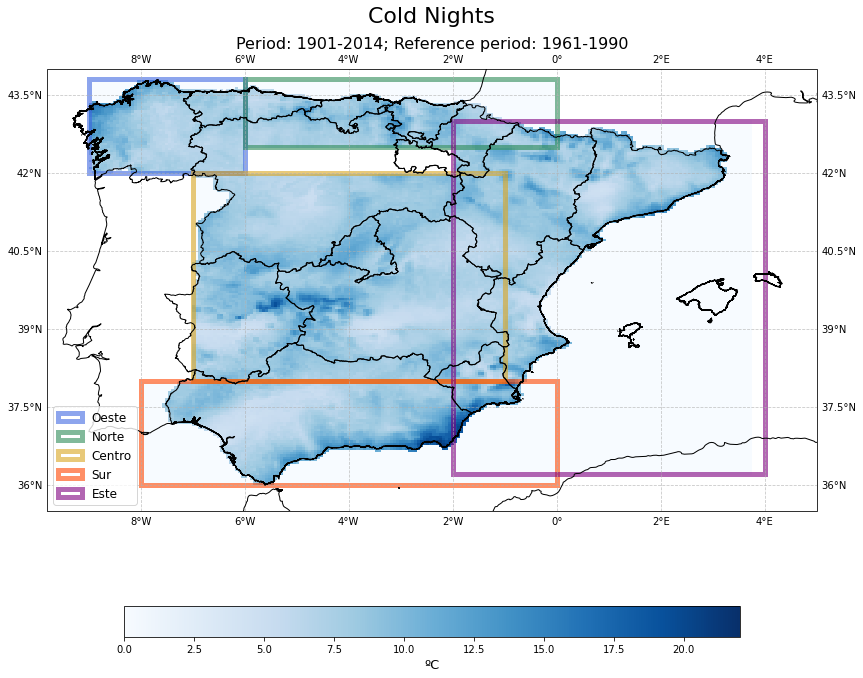

In [26]:
# Downloaded from http://biogeo.ucdavis.edu/data/gadm2/shp/DEU_adm.zip
fname = './mapas/gadm41_ESP_1.shp'

adm1_shapes = list(shpreader.Reader(fname).geometries())


fig, ax = plt.subplots(figsize=(12, 10), ncols=1)
ax=plt.subplot(1,1,1,projection=ccrs.PlateCarree())

plt.suptitle('Cold Nights',size=22)
plt.title('Period: 1901-2014; Reference period: 1961-1990',size=16)
ax.coastlines(resolution='10m')#, linewidth=2)

ax.add_geometries(adm1_shapes, ccrs.PlateCarree(), # Cuidado con los sistemas de coordenadas, esto esta definido solo para este sistema
                  edgecolor='black', facecolor='None', alpha=1)


ax.set_global() # added following an answer to my question
#ax.gridlines()
ax.gridlines(draw_labels = True,linestyle='--',alpha=0.7,zorder=1)

ax.set_extent([-9.8,5,35.5,44], ccrs.PlateCarree())
cmap = 'Blues'

var = percent_cold_nights_O.mean(dim='time')
im = ax.pcolormesh(var.lon,var.lat,var.squeeze(),cmap=cmap,vmin=0, vmax=22, transform =ccrs.PlateCarree()) # En transform se pone la proyección default en la que está los datos 
print(var.max().squeeze())

var = percent_cold_nights_E.mean(dim='time')
im = ax.pcolormesh(var.lon,var.lat,var.squeeze(),cmap=cmap,vmin=0, vmax=22, transform =ccrs.PlateCarree()) # En transform se pone la proyección default en la que está los datos 
print(var.max().squeeze())

var = percent_cold_nights_C.mean(dim='time')
im = ax.pcolormesh(var.lon,var.lat,var.squeeze(),cmap=cmap,vmin=0, vmax=22, transform =ccrs.PlateCarree()) 
print(var.max().squeeze())


var = percent_cold_nights_S.mean(dim='time')
im = ax.pcolormesh(var.lon,var.lat,var.squeeze(),cmap=cmap,vmin=0, vmax=22, transform =ccrs.PlateCarree())
print(var.max().squeeze())


var = percent_cold_nights_N.mean(dim='time')
im = ax.pcolormesh(var.lon,var.lat,var.squeeze(),cmap=cmap,vmin=0, vmax=22, transform =ccrs.PlateCarree())
print(var.max().squeeze())


cbar = fig.colorbar(im,ax=ax,orientation = 'horizontal',shrink=0.8)
cbar.set_label(label='ºC',size=13)
cbar.ax.set_xlim(0, 22)



def pinta_region(lats,lons,color,ax=ax,label=None):
    lat_corners = np.array([lats[0], lats[0],lats[1], lats[1]])
    lon_corners = np.array([ lons[0], lons[1], lons[1], lons[0]])
    poly_corners = np.zeros((len(lat_corners), 2), np.float64)
    poly_corners[:,0] = lon_corners
    poly_corners[:,1] = lat_corners
    poly = mpatches.Polygon(poly_corners, closed=True, ec=color, fill=False, lw=5, fc=color,label=label,alpha=0.6, transform=ccrs.Geodetic()) # geodetic para que transforme los rectángulos a la proyección correcta
    ax.add_patch(poly)


pinta_region([42,43.8],[-9,-6],'royalblue',ax,label='Oeste')
pinta_region([42.5,43.8],[-6,0],'seagreen',ax,label='Norte')
pinta_region([38, 42],[-7, -1],'goldenrod',ax,label='Centro')
pinta_region([36, 38],[-8, 0],'orangered',ax,label='Sur')
pinta_region([36.2, 43],[-2, 4],'purple',ax,label='Este')

ax.legend(prop={'size':12})
plt.tight_layout()


In [27]:
fig.savefig('cold_nights.png',dpi=600,facecolor='w')

Ahora las series temporales:

In [28]:
from matplotlib import style
plt.style.use('seaborn') # Estilo general

font = {'size'   : 14}
plt.rc('font', **font) # Tamaño generico de fuentes
parameters = {'xtick.labelsize':14,
              'ytick.labelsize':14,
              'axes.labelsize':14,
              'axes.labelweight':'bold',
              'axes.titleweight':'bold',
              'axes.titlesize':18,
              'legend.fontsize':15,
              'legend.frameon':True,
              'legend.facecolor':'w',
              'legend.title_fontsize':16,
              'ytick.major.size': 3.5,
              'ytick.major.width': 0.8,
              'xtick.major.size': 3.5,
              'xtick.major.width': 0.8,  
              'axes.linewidth':1,
              'axes.edgecolor':'grey',
              'xtick.color':'grey',
              'xtick.labelcolor':'k',
              'ytick.color':'grey',
              'ytick.labelcolor':'k'}
plt.rcParams.update(parameters)

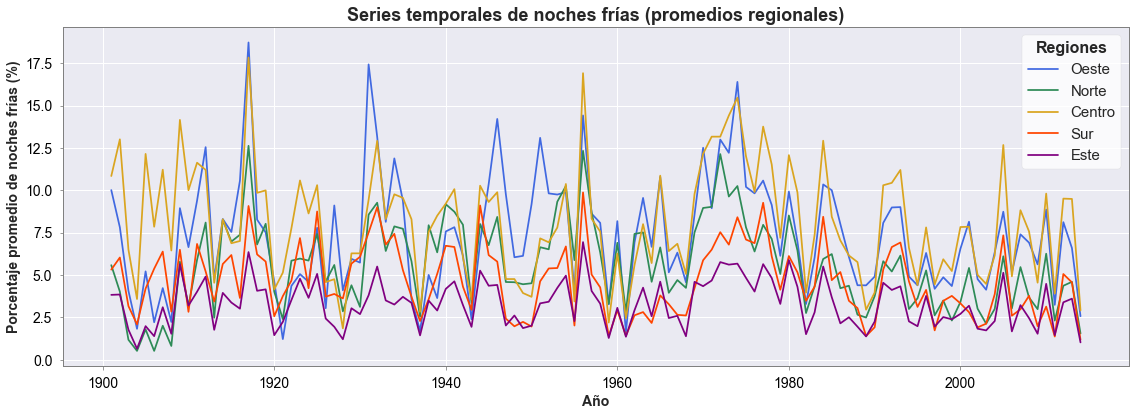

In [32]:
fig,ax = plt.subplots(figsize = (16,6))
años = percent_cold_nights_N['time.year']
ax.plot(años,percent_cold_nights_O.mean(dim=['lon','lat']),color='royalblue',label='Oeste')
ax.plot(años,percent_cold_nights_N.mean(dim=['lon','lat']),color='seagreen',label='Norte')
ax.plot(años,percent_cold_nights_C.mean(dim=['lon','lat']),color='goldenrod',label='Centro')
ax.plot(años,percent_cold_nights_S.mean(dim=['lon','lat']),color='orangered',label='Sur')
ax.plot(años,percent_cold_nights_E.mean(dim=['lon','lat']),color='purple',label='Este')
ax.legend(title='Regiones',title_fontproperties={'weight':'bold'}) # Leyenda con título
ax.set_xlabel(u'Año')
ax.set_ylabel(u'Porcentaje promedio de noches frías (%)')
ax.set_title('Series temporales de noches frías (promedios regionales)')
plt.tight_layout()

In [35]:
display(tmin_p10_E.sel(lon='4',lat='39', method="nearest"))
display(percent_cold_nights_O)

<xarray.DataArray 'per' (dayofyear: 366)>
array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan])
Coordinates:
    lon          float64 3.724
    lat          float64 38.99
    percentiles  int32 10
  * dayofyear    (dayofyear) int32 1 2 3 4 5 6 7 ... 360 361 362 363 364 365 366
Attributes:
    units:               °C
    long_name:           Minimum temperature
    climatology_bounds:  ['1961-01-01', '1990-12-31']
    window:              5
    alpha:               0.3333333333333333
    beta:                0.3333333333333333
    history:             [2022-11-17 00:34:29] per: percentile_doy(arr=tn, wi...

<xarray.DataArray (time: 114, lat: 40, lon: 51)>
array([[[ 0.      ,  0.      , ...,  0.      ,  0.      ],
        [ 0.      ,  0.      , ...,  0.      ,  0.      ],
        ...,
        [ 0.      , 10.684932, ...,  5.753425,  5.479452],
        [ 0.      ,  9.589041, ...,  6.027397,  6.849315]],

       [[ 0.      ,  0.      , ...,  0.      ,  0.      ],
        [ 0.      ,  0.      , ...,  0.      ,  0.      ],
        ...,
        [ 0.      ,  8.493151, ...,  7.123288,  6.027397],
        [ 0.      ,  8.219178, ...,  8.219178,  7.123288]],

       ...,

       [[ 0.      ,  0.      , ...,  0.      ,  0.      ],
        [ 0.      ,  0.      , ...,  0.      ,  0.      ],
        ...,
        [ 0.      ,  5.479452, ..., 13.150685, 14.794521],
        [ 0.      ,  5.479452, ..., 13.972603, 14.794521]],

       [[ 0.      ,  0.      , ...,  0.      ,  0.      ],
        [ 0.      ,  0.      , ...,  0.      ,  0.      ],
        ...,
        [ 0.      ,  1.09589 , ...,  6.849315,  6.575342],
        [ 0.      ,  0.547945, ...,  6.575342,  6.849315]]])
Coordinates:
  * lon          (lon) float64 -8.971 -8.912 -8.854 ... -6.163 -6.104 -6.046
  * lat          (lat) float64 43.76 43.72 43.67 43.63 ... 42.1 42.05 42.01
    percentiles  int32 ...
  * time         (time) datetime64[ns] 1901-01-01 1902-01-01 ... 2014-01-01

Hay que corregirlas, volver a poner los nan en las zonas de océano (si no se infravalora el porcentaje):

In [94]:
def correct_series(percent,tmin=tmin):
    tminR = tmin.sel(lat=slice(float(np.nanmax(percent.lat)),float(np.min(percent.lat))),lon=slice(float(np.min(percent.lon)),float(np.max(percent.lon))),Time=slice('1901','2014'))
    tminR_year = tminR.sel(Time=((tminR.Time.dt.month == 6) & (tminR.Time.dt.day == 1)))
    #tminR_year = tminR.groupby('Time.year').max('Time')
    corr_R = np.where(np.isnan(tminR_year),np.nan,percent)
    return np.nanmean(corr_R,axis=(1,2))

In [40]:
tminE = tmin.sel(lat=slice(43,36.2),lon=slice(-2,4),Time=slice('1901','2014'))
tminE_year = tminE.groupby('Time.year').mean('Time')

In [104]:
corr_E = correct_series(percent_cold_nights_E)

In [105]:
corr_N = correct_series(percent_cold_nights_N)

In [106]:
corr_S = correct_series(percent_cold_nights_S)

In [107]:
corr_O = correct_series(percent_cold_nights_O)

In [108]:
corr_C = correct_series(percent_cold_nights_C)

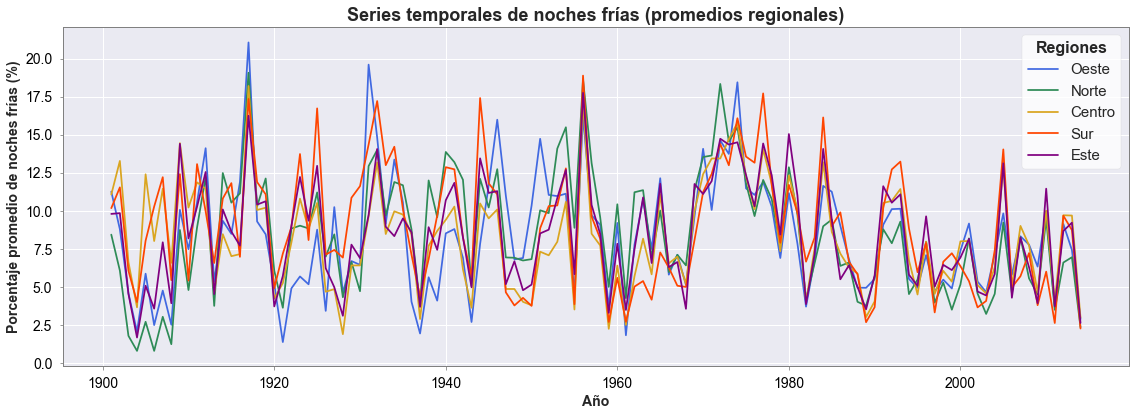

In [119]:
fig,ax = plt.subplots(figsize = (16,6))
años = percent_cold_nights_N['time.year']
ax.plot(años,corr_O,color='royalblue',label='Oeste')
ax.plot(años,corr_N,color='seagreen',label='Norte')
ax.plot(años,corr_C,color='goldenrod',label='Centro')
ax.plot(años,corr_S,color='orangered',label='Sur')
ax.plot(años,corr_E,color='purple',label='Este')

ax.legend(title='Regiones',title_fontproperties={'weight':'bold'}) # Leyenda con título
ax.set_xlabel(u'Año')
ax.set_ylabel(u'Porcentaje promedio de noches frías (%)')
ax.set_title('Series temporales de noches frías (promedios regionales)')
plt.tight_layout()

In [120]:
fig.savefig('series_reg.png',dpi=600,facecolor='w')

In [109]:
tminOm = tminO.mean(dim=['lon','lat'],keep_attrs=True)
tminOm



<xarray.DataArray 'tn' (Time: 41638)>
array([ 2.3032253 ,  1.679131  ,  1.7624679 , ..., -1.5089166 ,
       -1.5696096 , -0.08151622], dtype=float32)
Coordinates:
  * Time     (Time) datetime64[ns] 1901-01-02 1901-01-03 ... 2015-01-01
Attributes:
    units:      Celsius degrees
    long_name:  Minimum temperature

In [113]:
tminOm = tminOm.rename({'Time': 'time'})
tminOm.attrs['units'] = 'degC'

In [115]:
basem = tminOm.sel(time=slice('1961','1990'))
basem

<xarray.DataArray 'tn' (time: 10957)>
array([2.3487177 , 0.86258835, 2.015206  , ..., 3.645706  , 5.783328  ,
       5.418103  ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1961-01-01 1961-01-02 ... 1990-12-31
Attributes:
    units:      degC
    long_name:  Minimum temperature

In [116]:
tas_perm = percentile_doy(basem, per=10).sel(percentiles=10)
cold_daysm = tn10p(tminOm.sel(time=slice('1901','2014')), tas_perm)

In [117]:
perm = cold_daysm/365*100

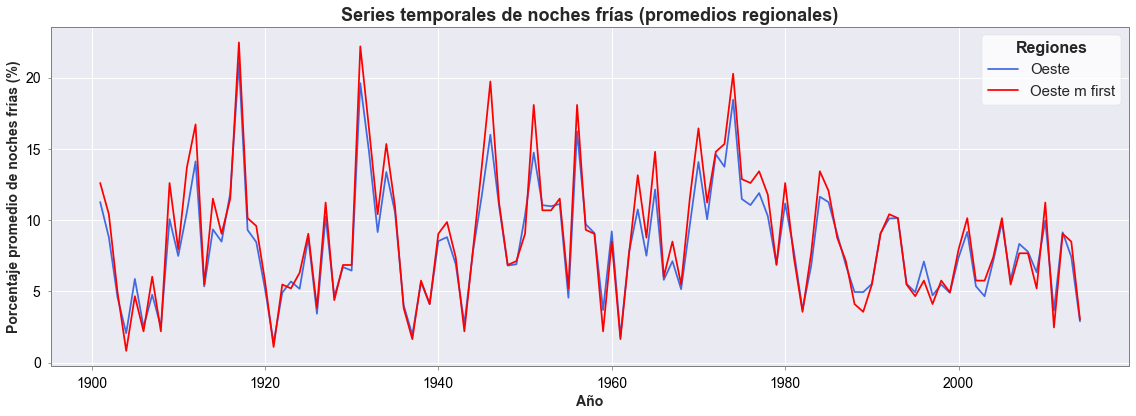

In [118]:
fig,ax = plt.subplots(figsize = (16,6))
años = percent_cold_nights_N['time.year']
ax.plot(años,corr_O,color='royalblue',label='Oeste')
ax.plot(años,perm,color='r',label='Oeste m first')


ax.legend(title='Regiones',title_fontproperties={'weight':'bold'}) # Leyenda con título
ax.set_xlabel(u'Año')
ax.set_ylabel(u'Porcentaje promedio de noches frías (%)')
ax.set_title('Series temporales de noches frías (promedios regionales)')
plt.tight_layout()